# Benjamin Benteke

# Importation de bibliotheques

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importation de donnees

In [5]:
data1=pd.read_csv('house_data.csv')

# Affichage de donnees 5 premieres observations

In [6]:
data1.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


# Affichage du nombre d'observations

In [7]:
print('on a:', len(data1), 'obseravations')

on a: 827 obseravations


# Verification de valeurs manquantes

In [8]:
pd.isna(data1).sum()

price             0
surface           5
arrondissement    5
dtype: int64

# Localisation de valeurs manquantes

In [9]:
data1[data1['arrondissement'].isnull()]

,price,surface,arrondissement
149,3000,NaN,NaN
339,980,NaN,NaN
509,1590,NaN,NaN
674,1580,NaN,NaN
742,450,NaN,NaN


# Checking of variables types

In [10]:
data1.dtypes

price               int64
surface           float64
arrondissement    float64
dtype: object

## BoxPlot pour bien voir de données manquantes et de Outliers

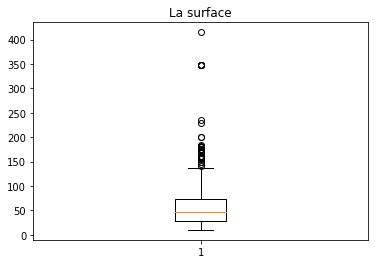

In [11]:
plt.boxplot(data1[data1['surface'].notna()].surface)
plt.title('La surface')
plt.show()

### Comment: on 5 données manquantes et quelques outliers

## Matrice de correlation

In [15]:
correlation=data1.corr()
correlation.style.background_gradient(cmap='PuBu')

,price,surface,arrondissement
price,1,0.8914,-0.200863
surface,0.8914,1,-0.134333
arrondissement,-0.200863,-0.134333,1


# 1ER MODELE

## Faisons l'imputation par la moyenne et le mode

#### calcul du mode de l'arrondissemnt (mode car elle catégorielle)

In [1099]:
data1['arrondissement'].mode()

0    4.0
dtype: float64

In [1100]:
data1['surface']=data1['surface'].fillna(data1['surface'].mean())
data1['arrondissement']=data1['arrondissement'].fillna(4)

## Checking again the missing values

In [1101]:
pd.isna(data1).sum()

price             0
surface           0
arrondissement    0
dtype: int64

In [1102]:
data1.shape

(827, 3)

# Data Description

In [1103]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,827.0,2007.342201,1890.894229,390.0,1050.0,1567.00,2346.00,25000.0
surface,827.0,58.045925,44.691640,10.0,29.0,46.42,72.85,415.0
arrondissement,827.0,4.141475,3.192464,1.0,2.0,3.00,4.00,10.0


# Separation de la cible et des descripteurs

In [1104]:
y=pd.DataFrame(data1['price'])

In [1105]:
y.head()

,price
0,1820
1,1750
2,1900
3,1950
4,1950


In [1106]:
X=data1.drop('price',axis=1)
X.head()

,surface,arrondissement
0,46.1,1.0
1,41.0,1.0
2,55.0,1.0
3,46.0,1.0
4,49.0,1.0


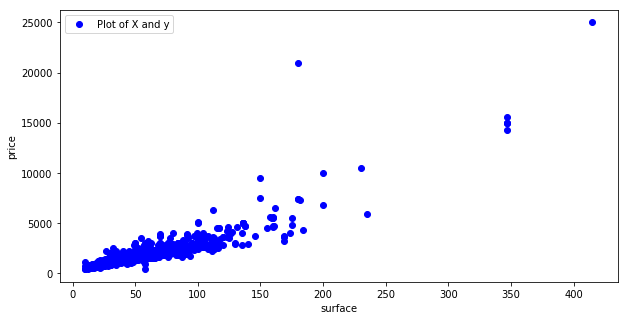

In [1107]:
plt.figure(figsize=(10,5))
plt.plot(X['surface'], y, 'bo',label='Plot of X and y')
plt.xlabel('surface')
plt.ylabel('price')
plt.legend()
plt.show()

# Normalisation des données

In [1108]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaler.fit(X)
Scaler.fit(y)
X=Scaler.transform(X)
y=Scaler.transform(y)

# Splitting of data to trainSet and TestSet

In [1109]:
from sklearn.model_selection import train_test_split

In [1110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [1111]:
print(np.round((len(X_train)/len(data1))*100,0),'%','et',np.round((len(X_test)/len(data1))*100,0),'%')

80.0 % et 20.0 %


# Creation du model

In [1112]:
from sklearn.linear_model import LinearRegression

In [1113]:
model1=LinearRegression() #creation du model
model1.fit(X_train,y_train) # Entrainement du modele

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Prediction du modele dans X_test

In [1114]:
y_pred=model1.predict(X_test)

# Metrics d'evaluation du modele

In [1115]:
from sklearn.metrics import mean_squared_error

# score (R^2) dans le trainSet

In [1116]:
model1.score(X_train,y_train)

0.7867839029461898

### Erreur quadratique moyenne et le score (R^2) dans le testSet

In [1117]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('R^2 dans X_train:',model1.score(X_test,y_test))

MSE: 0.28993612657673884
R^2 dans X_train: 0.8186065423203963


# Fin pour le premier model issu de l'imputaion moyenne pour la surface et mode pour l'arrondissement.

# creation d'un nouveau dataset en supprimant les valeurs manquantes

# suppression de valeurs manquantes

In [1154]:
data2=pd.read_csv('house_data.csv')

# 2EME MODELE

In [1155]:
data2.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [1156]:
data2=data2.dropna(axis=0)

In [1157]:
pd.isna(data2).sum()

price             0
surface           0
arrondissement    0
dtype: int64

# Data Description

In [1158]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
price,822.0,2010.306569,1895.091794,390.0,1052.500,1564.5,2348.0,25000.0
surface,822.0,58.045925,44.827522,10.0,28.655,46.1,73.0,415.0
arrondissement,822.0,4.142336,3.202151,1.0,2.000,3.0,4.0,10.0


## Boxplot 

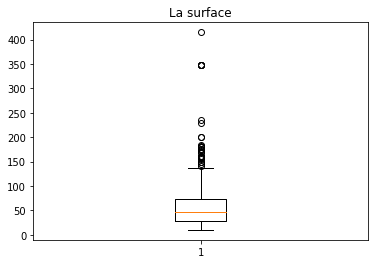

In [1159]:
plt.boxplot(data2[data2['surface'].notna()].surface)
plt.title('La surface')
plt.show()

## Matrice de corrilation

# Separation de features et target

In [1160]:
corr2=data2.corr()
correlation.style.background_gradient(cmap='PuBu')

,price,surface,arrondissement
price,1,0.8914,-0.200863
surface,0.8914,1,-0.134333
arrondissement,-0.200863,-0.134333,1


In [1161]:
y=pd.DataFrame(data2['price'])

In [1162]:
X=data2.drop('price',axis=1)

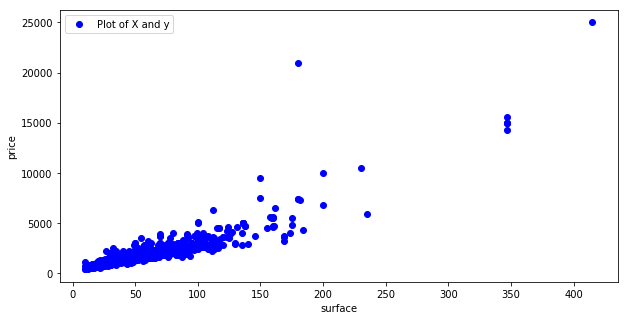

In [1163]:
plt.figure(figsize=(10,5))
plt.plot(X['surface'], y, 'bo',label='Plot of X and y')
plt.xlabel('surface')
plt.ylabel('price')
plt.legend()
plt.show()

# Normalisation de données

In [1164]:
Scaler=StandardScaler()
Scaler.fit(X)
Scaler.fit(y)
X=Scaler.transform(X)
y=Scaler.transform(y)

# Splitting of data Set to TrainSet and TestSet

In [1165]:
from sklearn.model_selection import train_test_split

In [1166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [1167]:
print(np.round((len(X_train)/len(data2))*100,0),'%','et',np.round((len(X_test)/len(data2))*100,0),'%')

80.0 % et 20.0 %


# creation du model

In [1168]:
from sklearn.linear_model import LinearRegression

In [1169]:
model2=LinearRegression()
model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Prediction dans X_test

In [1170]:
y_pred=model2.predict(X_test)

# Evaluation du modele par les metriques

In [1171]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('R^2 dans X_test:',model2.score(X_test,y_test))
print('R^2 dans X_train:',model2.score(X_train,y_train))

MSE: 0.07799178077323596
R^2 dans X_test: 0.8993837921085747
R^2 dans X_train: 0.7824235568274576


## Test avec les nouvelles données

In [1172]:
new_data={'surface':[46,35],'arrondissement':[1,4]}

In [1173]:
new_data=pd.DataFrame(new_data)
new_data.shape

(2, 2)

In [1174]:
new_data

,surface,arrondissement
0,46,1
1,35,4


### Predictions

In [1175]:
predict_model1=model1.predict(new_data)
predict_model2=model2.predict(new_data)
predict_model1

array([[1554.89675945],
       [1031.67164595]])

In [1176]:
new_data['Prediction 1 of price']=predict_model1
new_data['Prediction 2 of price']=predict_model2
new_data

,surface,arrondissement,Prediction 1 of price,Prediction 2 of price
0,46,1,1554.896759,1673.872512
1,35,4,1031.671646,1113.281302


### Comments:
On voit que le model 2 predit mieux.

# CONCLUSION